**Analysis** 
add analysis here

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
import numpy as np

# Study data files
mouse_metadata_path = ("C:/Users/miesb/OneDrive/Desktop/module_5_challenge/Starter_Code/Pymaceuticals/data/Mouse_metadata.csv")
study_results_path = ("C:/Users/miesb/OneDrive/Desktop/module_5_challenge/Starter_Code/Pymaceuticals/data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
distinct_mice = combined_data['Mouse ID'].nunique()
print(distinct_mice)

249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mouseid_time = combined_data.drop_duplicates(['Mouse ID', 'Timepoint'], keep='first')
print(mouseid_time)

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID','Timepoint'], keep=False)]
print(duplicate_mice)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [40]:
# Optional: Get all the data for the duplicate mouse ID
duplicate_mice



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [52]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_duplicate_mice = combined_data.drop_duplicates(subset=['Mouse ID'], keep='last')
drop_duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [53]:
# Checking the number of mice in the clean DataFrame.
drop_duplicate_mice['Mouse ID'].value_counts().sum()

249

##**Summary Statistics**

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

statistics_table = drop_duplicate_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median'])

statistics_table = statistics_table.rename(columns={
'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume'})
statistics_table.head()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

sem_tumor = drop_duplicate_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
variance_tumor = drop_duplicate_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_deviation_tumor = drop_duplicate_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

statistics_table['Tumor Volume Std. Error'] = sem_tumor
statistics_table['Tumor Volume Variance'] = variance_tumor
statistics_table['Tumor Volumen Std. Dev'] = std_deviation_tumor




# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame(statistics_table)
summary_statistics




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Std. Error,Tumor Volume Variance,Tumor Volumen Std. Dev
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,1.143038,32.663378,5.715188
Ceftamin,57.753977,59.851956,1.673114,69.982735,8.365568
Infubinol,58.178246,60.165180,1.720591,74.010875,8.602957
Ketapril,62.806191,64.487812,1.989184,98.921330,9.945920
Naftisol,61.205757,63.283288,2.059417,106.029927,10.297083
Placebo,60.508414,62.030594,1.774934,78.759797,8.874672
Propriva,56.736964,55.841410,1.665521,69.349002,8.327605
Ramicane,36.191390,36.561652,1.134308,32.166354,5.671539
Stelasyn,61.001707,62.192350,1.940056,90.331586,9.504293


In [51]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = statistics_table = drop_duplicate_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
table_title = 'Tumor Volume (mm3)'
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


# Filter the DataFrame down only to those columns to chart
state_and_inches = rain_df[["State","Inches"]]

# Set the index to be "State" so they will be used as labels
state_and_inches = state_and_inches.set_index("State")

state_and_inches.head()

count_chart.set_xlabel("Road Type")

# Create a bar chart based off of the group series from before
count_chart = count_road_types.plot(kind='bar', figsize=(6,8))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Road Type")
count_chart.set_ylabel("Number of Accidents")

plt.show()
plt.tight_layout()

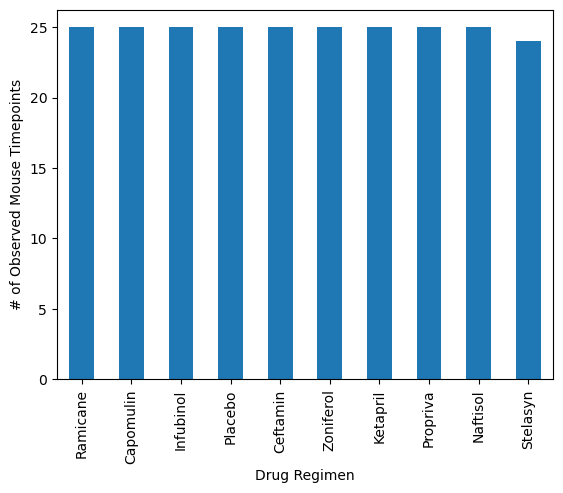

<Figure size 640x480 with 0 Axes>

In [60]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drop_duplicate_mice_chart = drop_duplicate_mice['Drug Regimen'].value_counts()
drop_duplicate_mice_chart.plot(kind='bar')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()
plt.tight_layout()

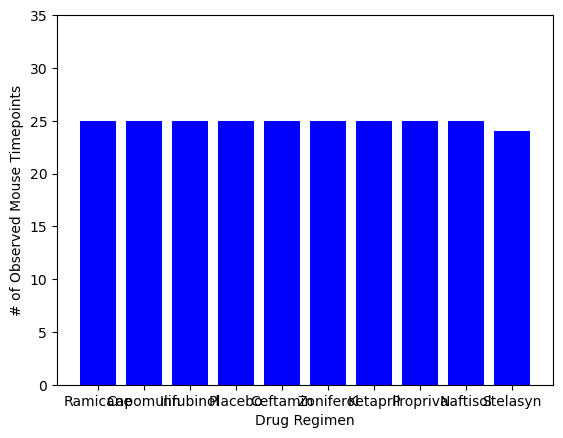

In [78]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs_chart = drop_duplicate_mice['Drug Regimen'].value_counts()

plt.bar(drugs_chart.index, drugs_chart, color='b', align="center")
        
plt.ylim(0, 35)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

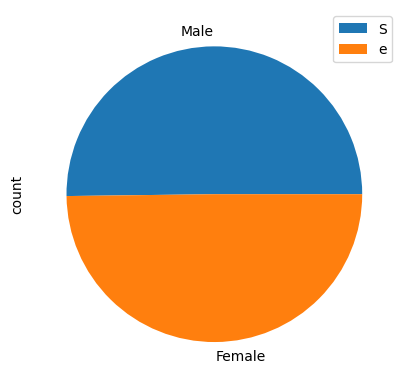

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
drop_duplicate_mice_chart = drop_duplicate_mice['Sex'].value_counts()
drop_duplicate_mice_chart.plot(kind='pie')

plt.legend("Sex")
plt.show()


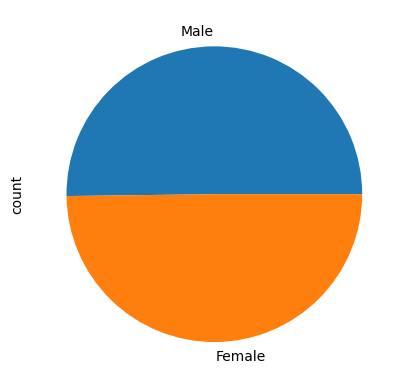

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
drop_duplicate_mice_chart = drop_duplicate_mice['Sex'].value_counts()

drop_duplicate_mice_chart.plot.pie()
        

plt.show()

##**Quartiles, Outliers and Boxplots**

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

##**Correlation and Regression**

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
